<a href="https://colab.research.google.com/github/Daya-1-sgr/Oil_spill_prediction/blob/main/oil_spill_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

Reading the Dataset

In [2]:
df=pd.read_csv("/content/oil_spill.csv")
df.head()

,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,f_10,...,f_41,f_42,f_43,f_44,f_45,f_46,f_47,f_48,f_49,target
0,1,2558,1506.09,456.63,90,6395000,40.88,7.89,29780.0,0.19,...,2850.00,1000.00,763.16,135.46,3.73,0,33243.19,65.74,7.95,1
1,2,22325,79.11,841.03,180,55812500,51.11,1.21,61900.0,0.02,...,5750.00,11500.00,9593.48,1648.80,0.60,0,51572.04,65.73,6.26,0
2,3,115,1449.85,608.43,88,287500,40.42,7.34,3340.0,0.18,...,1400.00,250.00,150.00,45.13,9.33,1,31692.84,65.81,7.84,1
3,4,1201,1562.53,295.65,66,3002500,42.40,7.97,18030.0,0.19,...,6041.52,761.58,453.21,144.97,13.33,1,37696.21,65.67,8.07,1
4,5,312,950.27,440.86,37,780000,41.43,7.03,3350.0,0.17,...,1320.04,710.63,512.54,109.16,2.58,0,29038.17,65.66,7.35,0


Checking the shape of the dataset

In [3]:
df.shape

(937, 50)

Detailed info of Column DataTypes and Non Null Values

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 937 entries, 0 to 936
Data columns (total 50 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f_1     937 non-null    int64  
 1   f_2     937 non-null    int64  
 2   f_3     937 non-null    float64
 3   f_4     937 non-null    float64
 4   f_5     937 non-null    int64  
 5   f_6     937 non-null    int64  
 6   f_7     937 non-null    float64
 7   f_8     937 non-null    float64
 8   f_9     937 non-null    float64
 9   f_10    937 non-null    float64
 10  f_11    937 non-null    float64
 11  f_12    937 non-null    float64
 12  f_13    937 non-null    float64
 13  f_14    937 non-null    float64
 14  f_15    937 non-null    float64
 15  f_16    937 non-null    float64
 16  f_17    937 non-null    float64
 17  f_18    937 non-null    float64
 18  f_19    937 non-null    float64
 19  f_20    937 non-null    float64
 20  f_21    937 non-null    float64
 21  f_22    937 non-null    float64
 22  f_

Checking for Null Values

In [5]:
Null_value_cols=df.columns[df.isnull().sum()>0]
print(Null_value_cols)

Index([], dtype='object')


So,there are no null values

Checking for Constant Columns

In [6]:
df.nunique()

,0
f_1,238
f_2,297
f_3,927
f_4,933
f_5,179
f_6,375
f_7,820
f_8,618
f_9,561
f_10,57


In [7]:
constant_cols=df.columns[df.nunique()==1]
print(constant_cols)

Index(['f_23'], dtype='object')


Dropping the Constant Columns

In [8]:
df.drop('f_23',axis=1,inplace=True)

Checking for columns with Unique Identifiers

In [9]:
unique_identifier_threshold=0.85*df.shape[0]
unique_identifier_cols=df.columns[df.nunique()>=unique_identifier_threshold]
print(unique_identifier_cols)

Index(['f_3', 'f_4', 'f_7', 'f_17', 'f_18', 'f_47'], dtype='object')


Dropping the Unique Identifiers

In [10]:
df.drop(columns=unique_identifier_cols,axis=1,inplace=True)

In [11]:
df.sample(7)

,f_1,f_2,f_5,f_6,f_8,f_9,f_10,f_11,f_12,f_13,...,f_40,f_41,f_42,f_43,f_44,f_45,f_46,f_48,f_49,target
746,14,24,69,194400,6.94,2075.0,0.14,93.7,0.27,0.31,...,50,969.33,180.00,90.00,42.43,10.77,1,66.06,5.93,0
682,35,20,114,162000,16.77,1641.0,0.22,98.7,0.19,0.20,...,73,569.21,201.25,138.54,53.74,4.11,0,66.20,6.17,0
380,107,75,154,187500,7.77,2120.0,0.20,88.4,0.15,0.25,...,63,492.44,447.21,240.57,122.03,2.05,0,65.85,7.31,0
863,131,12,66,97200,4.51,1101.0,0.08,88.3,0.24,0.28,...,50,569.21,90.00,60.00,46.48,9.49,1,65.65,6.53,0
733,1,1574,85,12749400,17.50,33541.0,0.28,380.1,0.33,0.38,...,50,8042.29,2892.63,1719.49,753.07,4.68,0,65.72,6.22,0
859,127,14,74,113400,8.40,974.0,0.16,116.4,0.25,0.30,...,50,484.66,180.00,126.00,80.50,3.85,0,66.06,5.99,0
717,70,13,166,105300,9.04,1011.0,0.12,104.2,0.17,0.18,...,73,371.08,180.00,67.50,86.17,5.50,0,66.25,6.19,0


In [12]:
df.shape

(937, 43)

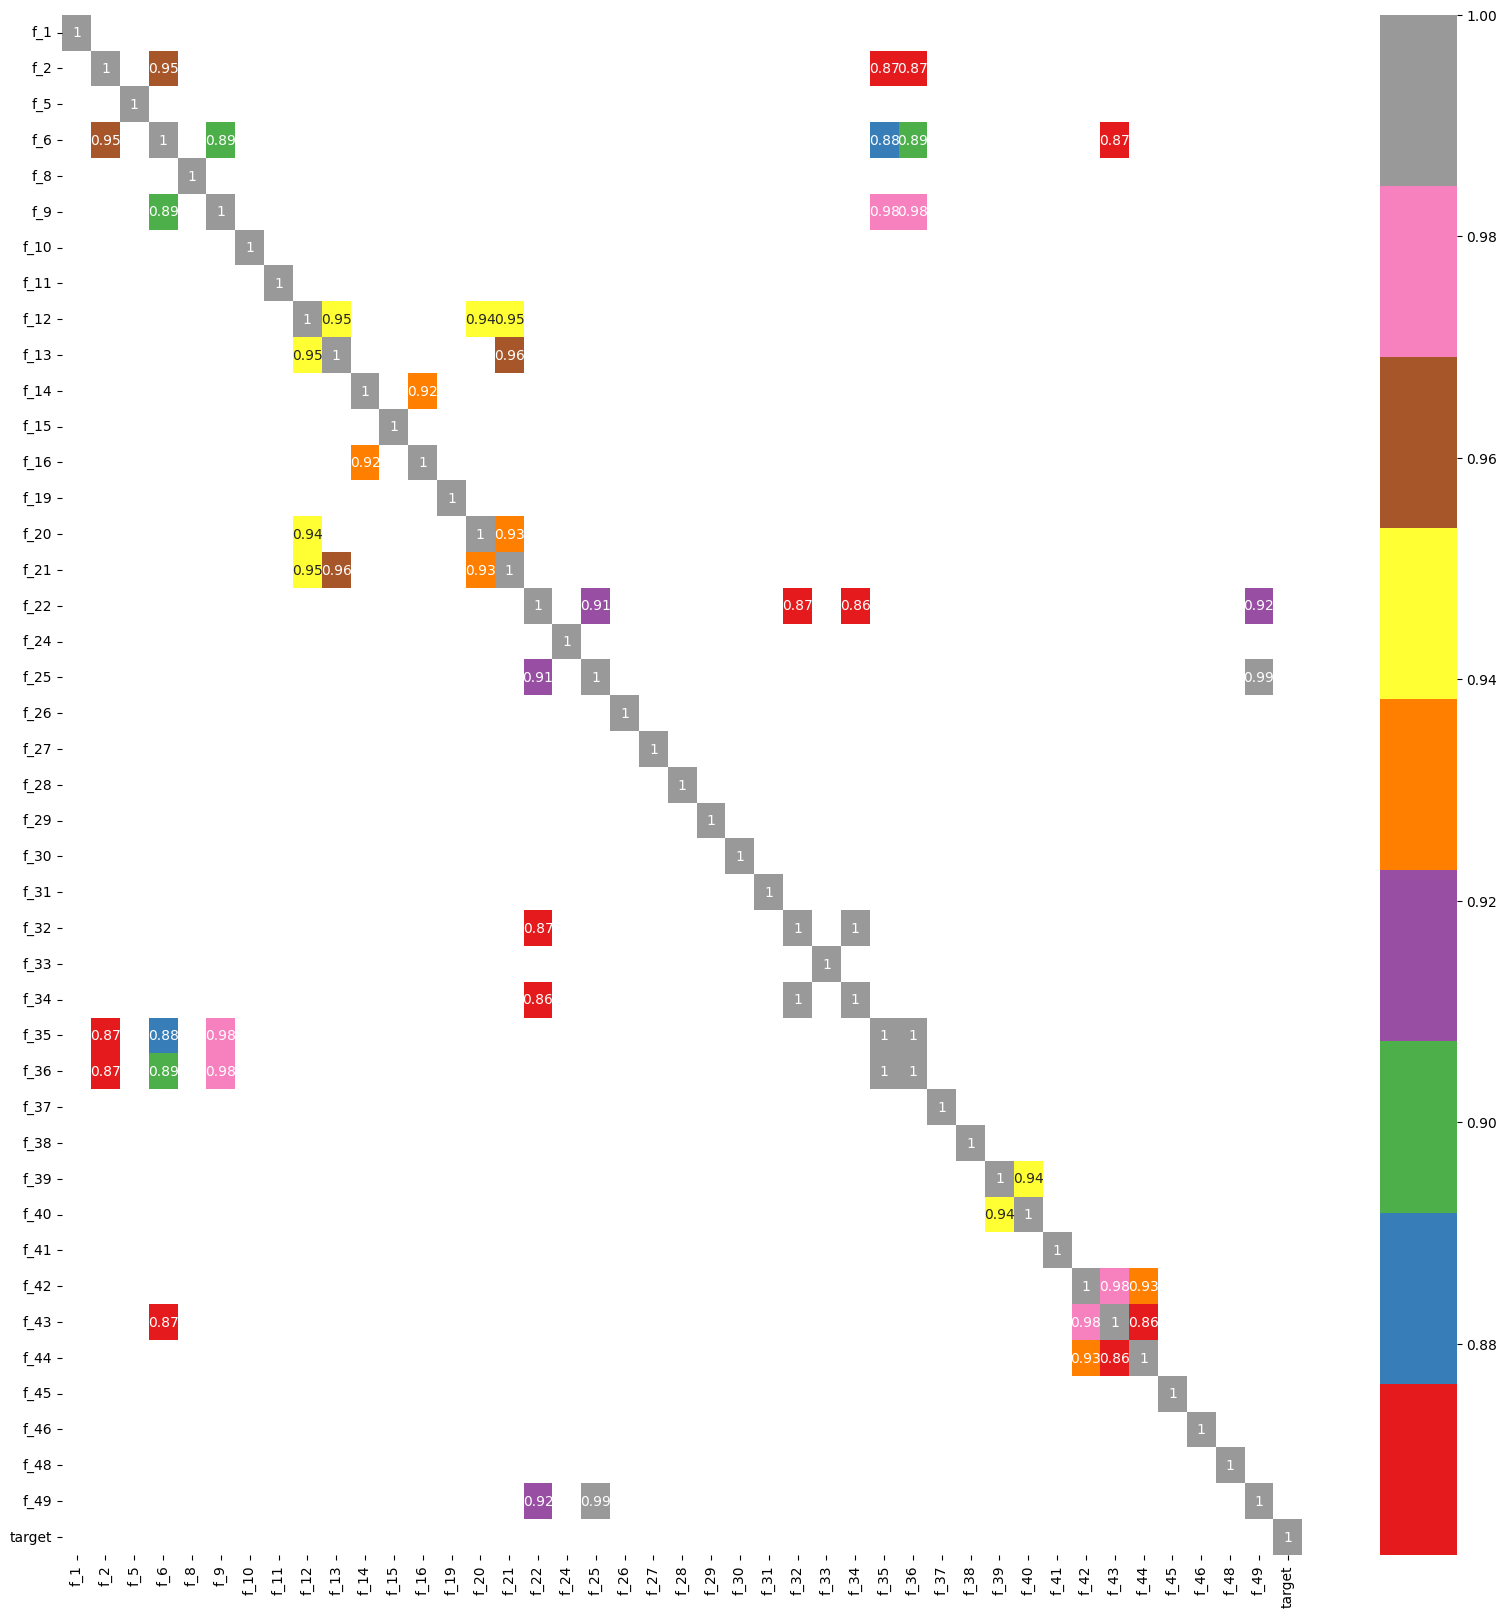

In [13]:
correlation_threshold=0.85
correlation_matrix=df.corr()
high_corr=correlation_matrix[correlation_matrix>correlation_threshold]
plt.figure(figsize=(20,20))
sns.heatmap(high_corr,annot=True,cmap='Set1')
plt.show()

In [14]:
def correlation(dataset,threshold):
  cols=set()
  corr_matrix=dataset.corr()
  for i in range(len(corr_matrix.columns)):
    for j in range(i):
      if abs(corr_matrix.iloc[i,j])>threshold:
        colname=corr_matrix.columns[i]
        cols.add(colname)
  return list(cols)
corr_features=correlation(df,correlation_threshold)
print(corr_features)
print(len(corr_features))

['f_16', 'f_48', 'f_43', 'f_34', 'f_6', 'f_13', 'f_40', 'f_20', 'f_49', 'f_30', 'f_32', 'f_35', 'f_36', 'f_21', 'f_25', 'f_44', 'f_9']
17


Removing Highly correlated columns

In [15]:
df.drop(columns=corr_features,axis=1,inplace=True)

In [16]:
df.shape

(937, 26)

In [17]:
df.head()

,f_1,f_2,f_5,f_8,f_10,f_11,f_12,f_14,f_15,f_19,...,f_31,f_33,f_37,f_38,f_39,f_41,f_42,f_45,f_46,target
0,1,2558,90,7.89,0.19,214.7,0.21,0.49,0.10,1.84,...,-0.18,0.0,0.00,138.68,89,2850.00,1000.00,3.73,0,1
1,2,22325,180,1.21,0.02,901.7,0.02,0.11,0.01,2.30,...,0.00,0.0,0.00,68.65,89,5750.00,11500.00,0.60,0,0
2,3,115,88,7.34,0.18,86.1,0.21,0.50,0.17,1.82,...,-0.23,0.0,0.01,38.80,89,1400.00,250.00,9.33,1,1
3,4,1201,66,7.97,0.19,166.5,0.21,0.48,0.10,1.91,...,-0.33,0.0,0.00,108.27,89,6041.52,761.58,13.33,1,1
4,5,312,37,7.03,0.17,232.8,0.15,0.35,0.09,1.86,...,-0.44,0.0,0.00,14.39,89,1320.04,710.63,2.58,0,0


All 26 columns are numerical columns,we have to use standard scaler

In [19]:
x=df.drop('target',axis=1)
y=df['target']

In [20]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

In [21]:
from  sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=42)

Functions for evaluating models

In [22]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,precision_score,recall_score,f1_score,roc_auc_score,auc,roc_curve

In [27]:
d={'model':[],'TP':[],'TN':[],'FP':[],'FN':[],'accuracy':[],'precision':[],'recall':[],'f1_score':[],'roc_auc_score':[]}
def eval_model(model,model_name,x_test,y_test,d):
  y_pred=model.predict(x_test)
  cm = confusion_matrix(y_test, y_pred)
  if cm.shape == (2, 2):
    tn, fp, fn, tp = cm.ravel()
  else:
    tn, fp, fn, tp = 0, 0, 0, 0
  d['model'].append(model_name)
  d['TP'].append(tp)
  d['TN'].append(tn)
  d['FP'].append(fp)
  d['FN'].append(fn)
  d['accuracy'].append(accuracy_score(y_test,y_pred))
  d['precision'].append(precision_score(y_test,y_pred))
  d['recall'].append(recall_score(y_test,y_pred))
  d['f1_score'].append(f1_score(y_test,y_pred))
  d['roc_auc_score'].append(roc_auc_score(y_test,y_pred))



In [24]:
def plot_roc_curve(model,y_test):
  fpr,tpr,thresholds=roc_curve(y_test,model.predict_proba(x_test)[:,1])
  auc_score=roc_auc_score(y_test,model.predict_proba(x_test)[:,1])
  print("AUC Score: ",auc_score)
  plt.plot(fpr,tpr,color='orange',label='ROC')
  plt.plot([0,1],[0,1],color='darkblue',linestyle='--')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.grid()
  plt.legend()
  plt.show()

In [25]:
def mscore(model):
  print("Train Score: ",model.score(x_train,y_train))
  print("Test Score: ",model.score(x_test,y_test))

Applying Logistic Regression

In [28]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)
eval_model(lr,'Logistic Regression',x_test,y_test,d)
mscore(lr)

Train Score:  0.9559412550066756
Test Score:  0.9680851063829787


AUC Score:  0.9065934065934065


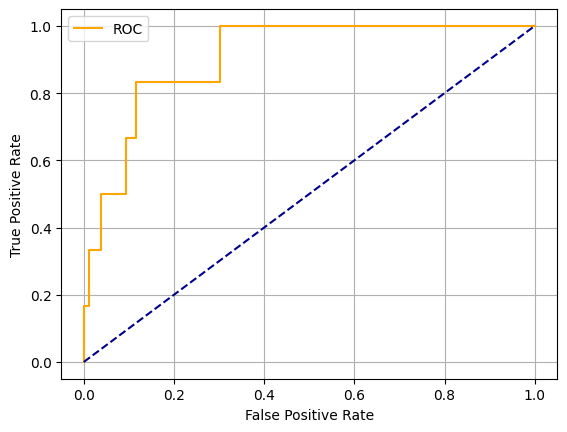

In [29]:
plot_roc_curve(lr,y_test)

Train Score:  1.0
Test Score:  0.9361702127659575
AUC Score:  0.7252747252747251


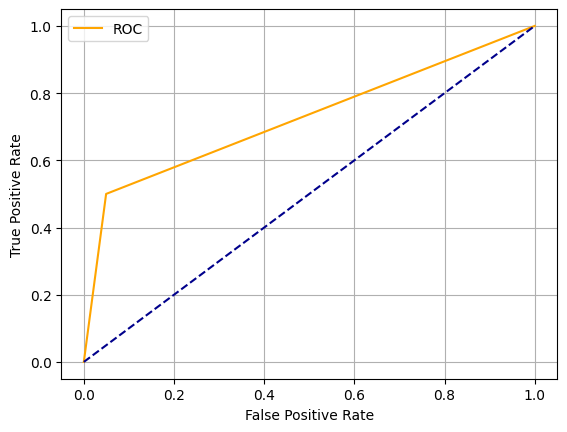

In [30]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
eval_model(dt,'Decision Tree',x_test,y_test,d)
mscore(dt)
plot_roc_curve(dt,y_test)

Random forest Classifier

Train Score:  1.0
Test Score:  0.973404255319149
AUC Score:  0.9551282051282051


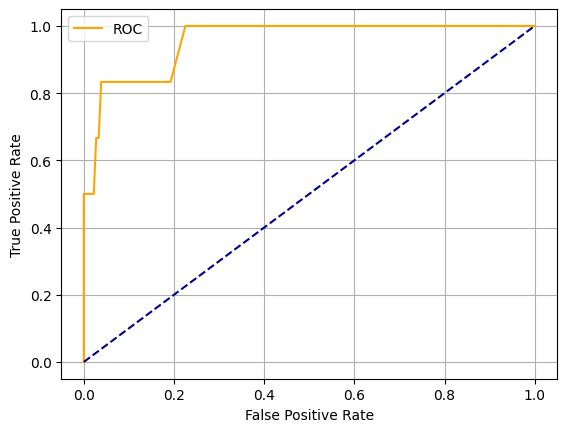

In [31]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
eval_model(rf,'Random Forest',x_test,y_test,d)
mscore(rf)
plot_roc_curve(rf,y_test)

Using SVC

Train Score:  0.9546061415220294
Test Score:  0.9680851063829787
AUC Score:  0.9120879120879122


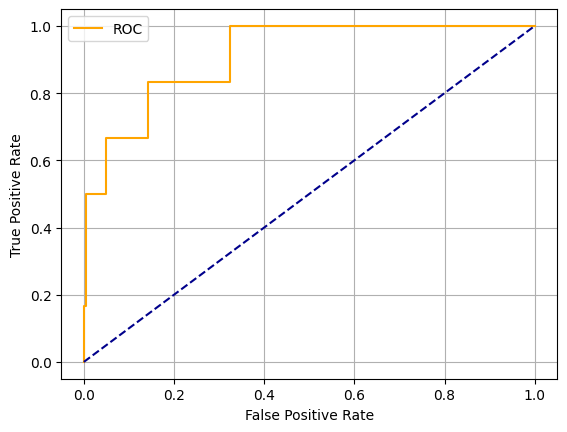

In [33]:
from sklearn.svm import SVC
svc=SVC(probability=True)
svc.fit(x_train,y_train)
eval_model(svc,'SVC',x_test,y_test,d)
mscore(svc)
plot_roc_curve(svc,y_test)


KNN Classifier

Train Score:  0.9546061415220294
Test Score:  0.9680851063829787
AUC Score:  0.6053113553113553


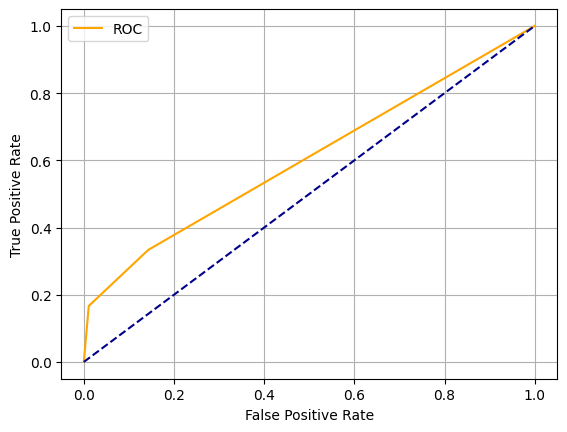

In [34]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
eval_model(knn,'KNN',x_test,y_test,d)
mscore(knn)
plot_roc_curve(knn,y_test)

Using Naive Bayes

Train Score:  0.14419225634178906
Test Score:  0.10106382978723404
AUC Score:  0.5952380952380952


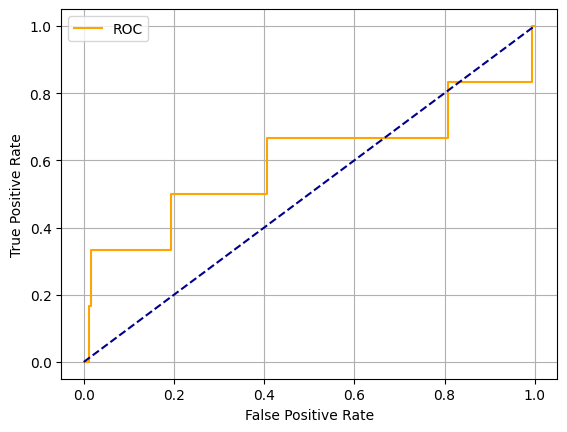

In [35]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(x_train,y_train)
eval_model(nb,'Naive Bayes',x_test,y_test,d)
mscore(nb)
plot_roc_curve(nb,y_test)

Using Gradient boosting Classifier

Train Score:  1.0
Test Score:  0.9787234042553191
AUC Score:  0.9615384615384615


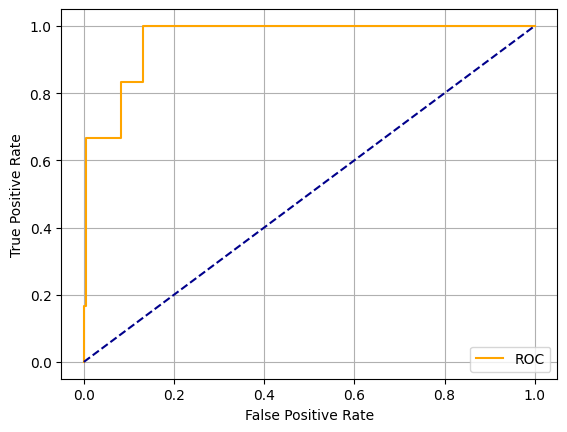

In [36]:
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier()
gb.fit(x_train,y_train)
eval_model(gb,'Gradient Boosting',x_test,y_test,d)
mscore(gb)
plot_roc_curve(gb,y_test)


Using XGBoost Classifier

Train Score:  1.0
Test Score:  0.9787234042553191
AUC Score:  0.9743589743589743


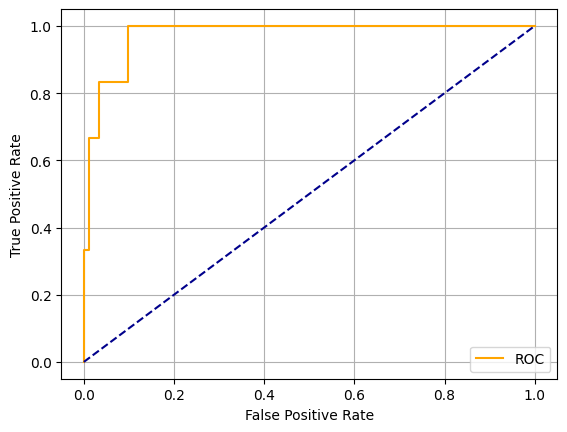

In [37]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(x_train,y_train)
eval_model(xgb,'XGBoost',x_test,y_test,d)
mscore(xgb)
plot_roc_curve(xgb,y_test)

Using LightGBM

[LightGBM] [Info] Number of positive: 35, number of negative: 714
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001033 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2622
[LightGBM] [Info] Number of data points in the train set: 749, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.046729 -> initscore=-3.015535
[LightGBM] [Info] Start training from score -3.015535
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

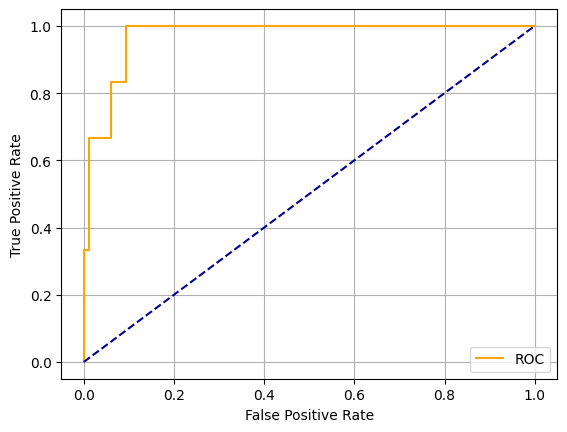

In [38]:
from lightgbm import LGBMClassifier
lgbm=LGBMClassifier()
lgbm.fit(x_train,y_train)
eval_model(lgbm,'LightGBM',x_test,y_test,d)
mscore(lgbm)
plot_roc_curve(lgbm,y_test)

Using Catboost Classifier

In [41]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.8 MB/s eta 0:00:00


Learning rate set to 0.009106
0:	learn: 0.6796655	total: 57.1ms	remaining: 57.1s
1:	learn: 0.6670527	total: 67.3ms	remaining: 33.6s
2:	learn: 0.6545282	total: 80ms	remaining: 26.6s
3:	learn: 0.6428289	total: 93.3ms	remaining: 23.2s
4:	learn: 0.6292821	total: 98.4ms	remaining: 19.6s
5:	learn: 0.6180403	total: 122ms	remaining: 20.2s
6:	learn: 0.6051537	total: 138ms	remaining: 19.6s
7:	learn: 0.5938826	total: 167ms	remaining: 20.7s
8:	learn: 0.5835219	total: 179ms	remaining: 19.8s
9:	learn: 0.5724921	total: 196ms	remaining: 19.4s
10:	learn: 0.5615226	total: 211ms	remaining: 19s
11:	learn: 0.5510519	total: 238ms	remaining: 19.6s
12:	learn: 0.5411831	total: 252ms	remaining: 19.2s
13:	learn: 0.5316821	total: 271ms	remaining: 19.1s
14:	learn: 0.5212833	total: 303ms	remaining: 19.9s
15:	learn: 0.5123645	total: 327ms	remaining: 20.1s
16:	learn: 0.5021183	total: 354ms	remaining: 20.4s
17:	learn: 0.4930340	total: 374ms	remaining: 20.4s
18:	learn: 0.4843651	total: 397ms	remaining: 20.5s
19:	learn:

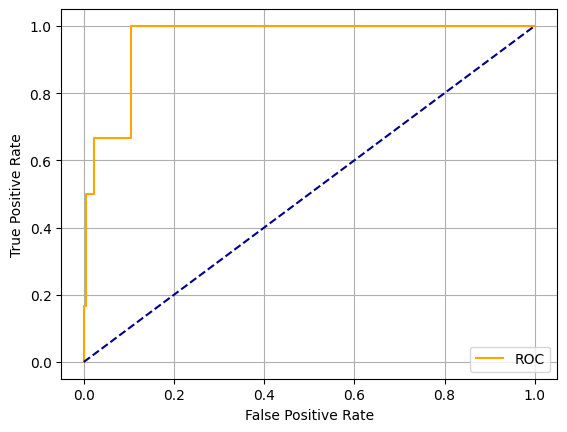

In [42]:
from catboost import CatBoostClassifier
cb=CatBoostClassifier()
cb.fit(x_train,y_train)
eval_model(cb,'CatBoost',x_test,y_test,d)
mscore(cb)
plot_roc_curve(cb,y_test)

Using Adaboost classifier

Train Score:  0.9879839786381842
Test Score:  0.9680851063829787
AUC Score:  0.7765567765567766


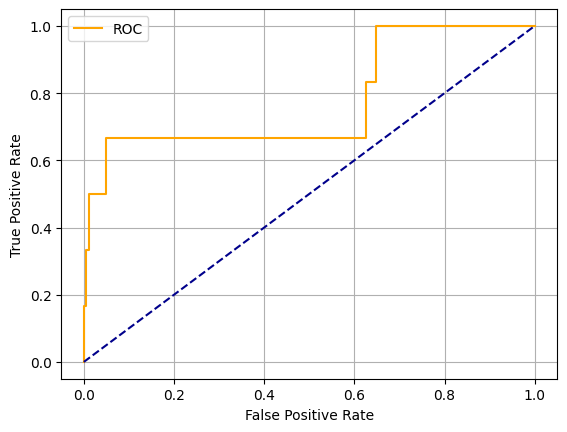

In [43]:
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier()
ada.fit(x_train,y_train)
eval_model(ada,'AdaBoost',x_test,y_test,d)
mscore(ada)
plot_roc_curve(ada,y_test)

In [44]:
eval_df=pd.DataFrame(d)
eval_df

,model,TP,TN,FP,FN,accuracy,precision,recall,f1_score,roc_auc_score
0,Logistic Regression,0,182,0,6,0.968085,0.000000,0.000000,0.000000,0.500000
1,Decision Tree,3,173,9,3,0.936170,0.250000,0.500000,0.333333,0.725275
2,Random Forest,1,182,0,5,0.973404,1.000000,0.166667,0.285714,0.583333
3,SVC,0,182,0,6,0.968085,0.000000,0.000000,0.000000,0.500000
4,SVC,0,182,0,6,0.968085,0.000000,0.000000,0.000000,0.500000
5,KNN,0,182,0,6,0.968085,0.000000,0.000000,0.000000,0.500000
6,Naive Bayes,5,14,168,1,0.101064,0.028902,0.833333,0.055866,0.455128
7,Gradient Boosting,3,181,1,3,0.978723,0.750000,0.500000,0.600000,0.747253
8,XGBoost,2,182,0,4,0.978723,1.000000,0.333333,0.500000,0.666667
9,LightGBM,2,180,2,4,0.968085,0.500000,0.333333,0.400000,0.661172


Key Observations:


  1.   Logistic Regression, SVC, KNN, and Naive Bayes show low performance across all metrics. These models seem to be underperforming, particularly with precision and recall (both are 0 for the positive class)
  2.   Random Forest, XGBoost, and Gradient Boosting are performing quite well on accuracy and ROC AUC but still have lower precision and recall for the positive class, especially for Random Forest (both versions) and XGBoost.
  3.  Gradient Boosting stands out with:

    *   Accuracy of 97.87% (second highest).
    *   Precision of 0.75 and Recall of 0.5, which are decent for imbalanced datasets.
    *   F1 Score of 0.6, which is a good balance between precision and recall.
    *   ROC AUC of 0.747, the highest among all models.
  4.  XGBoost and CatBoost also perform well, with XGBoost achieving perfect precision (1.0), but its recall is much lower at 0.333. CatBoost has a more balanced performance in terms of precision (0.667) and recall (0.333).

Gradient Boosting appears to be the best model for a good balance of performance and generalization, as it has:


    *   Good accuracy (97.87%)
    *   High ROC AUC score (0.747), indicating that the model is effectively distinguishing between classes.
    *   Decent precision and recall, with an F1 score of 0.6, which suggests a good trade-off between detecting positives and minimizing false positives.
It has slightly lower precision than XGBoost but a much higher recall and F1 score, which indicates it is more balanced in terms of predicting both positive and negative classes correctly.














Based on the F1 score, ROC AUC score, and general performance, **Gradient Boosting** is the model that performs the best without overfitting. It strikes a reasonable balance between precision and recall and achieves high ROC AUC, which means it is generalizing better on unseen data.

In [48]:
import pickle
with open('gbmodel.pkl','wb') as f:
  pickle.dump(gb,f)
